In [2]:
import tensorflow as tf

In [3]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

import math
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)


In [5]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised = True, with_info = True)
train_dataset, test_dataset = dataset['train'], dataset['test']


Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [7]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print(num_train_examples)
print(num_test_examples)

60000
10000


In [8]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

In [9]:
train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

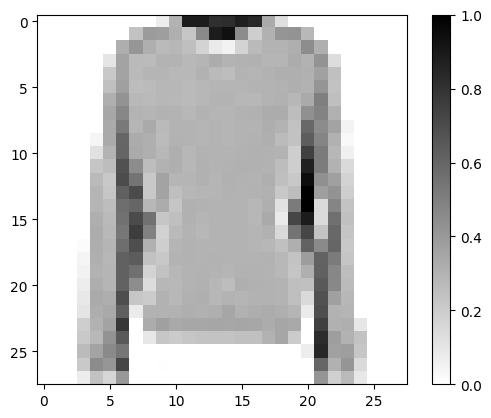

In [11]:
for images, labels in train_dataset.take(1):
  break
images = images.numpy().reshape((28, 28))

plt.figure()
plt.imshow(images, cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

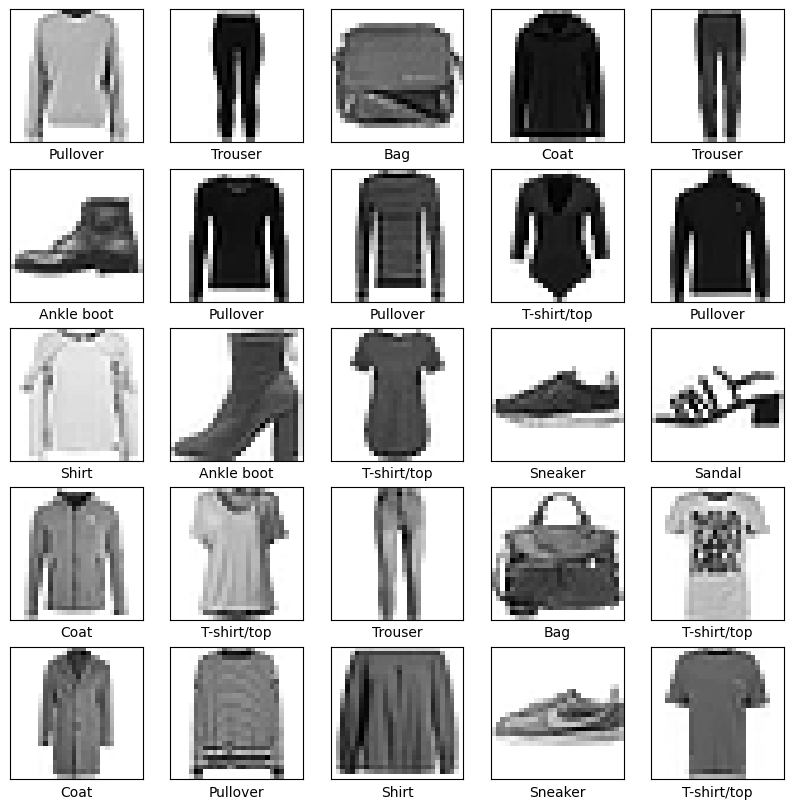

In [13]:
plt.figure(figsize = (10, 10))
i = 0
for images, labels in train_dataset.take(25):
  images = images.numpy().reshape((28, 28))
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(images, cmap = plt.cm.binary)
  plt.xlabel(class_names[labels])
  i+=1
plt.show()

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = 'same', activation = tf.nn.relu,
                           input_shape = (28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides = 2),
    tf.keras.layers.Conv2D(64, (3, 3), padding = 'same', activation = tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [16]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [17]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [19]:
model.fit(train_dataset, epochs = 10, steps_per_epoch = math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 17s 4ms/step - loss: 0.4050 - accuracy: 0.8537
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2625 - accuracy: 0.9048
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2123 - accuracy: 0.9213
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1814 - accuracy: 0.9332
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1555 - accuracy: 0.9430
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1305 - accuracy: 0.9507
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1133 - accuracy: 0.9582
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0944 - accuracy: 0.9651
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0815 - accuracy: 0.9693
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.06

In [20]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps = math.ceil(num_test_examples/32))
print(test_accuracy)

313/313 [==============================] - 2s 6ms/step - loss: 0.3385 - accuracy: 0.9209
0.9208999872207642


In [21]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

1/1 [==============================] - 0s 149ms/step


In [23]:
predictions.shape

(32, 10)

In [25]:
predictions[0]

array([3.4222417e-12, 2.5085065e-09, 2.0883889e-04, 5.4168102e-12,
       9.9798310e-01, 6.5627503e-11, 1.8080404e-03, 1.4457252e-12,
       7.6067153e-10, 6.7839570e-09], dtype=float32)

In [26]:
np.argmax(predictions[0])

4

In [28]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

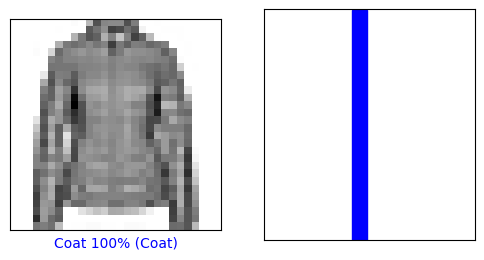

In [29]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

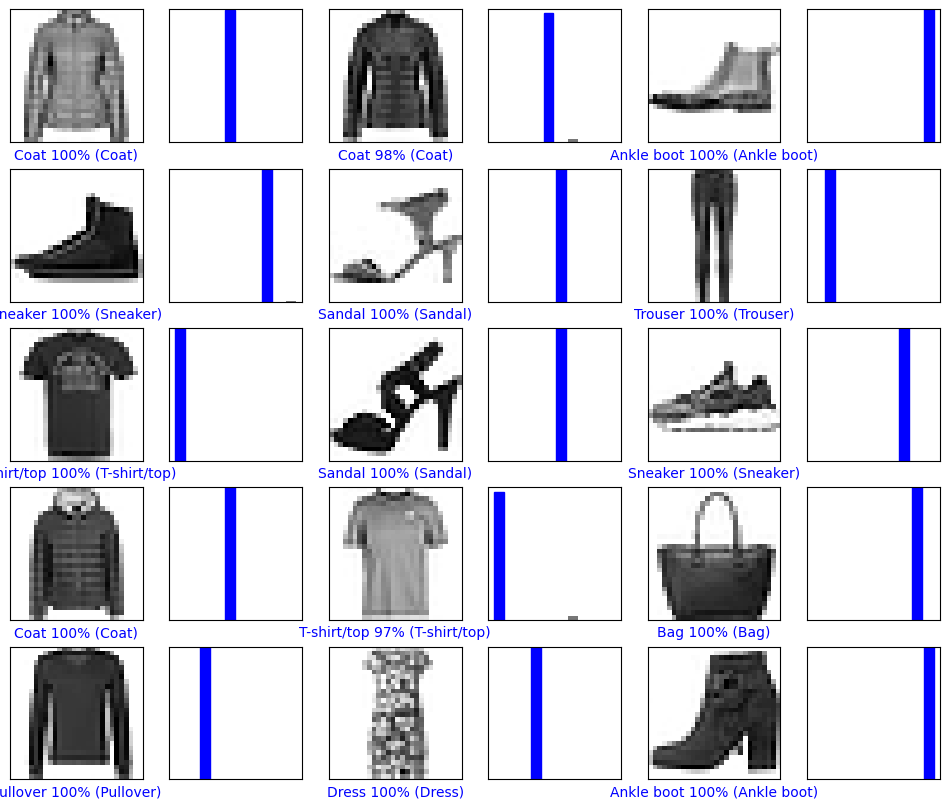

In [30]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [31]:
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [34]:
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [35]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 177ms/step
[[3.4222221e-12 2.5085161e-09 2.0883788e-04 5.4168102e-12 9.9798310e-01
  6.5627628e-11 1.8080387e-03 1.4457306e-12 7.6067153e-10 6.7839698e-09]]


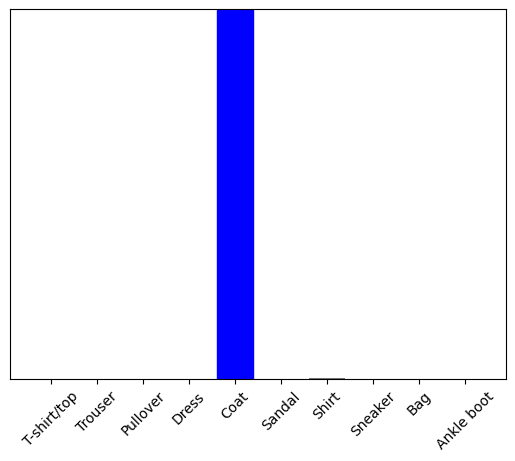

In [36]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [37]:
np.argmax(predictions_single[0])

4